In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
df_train = pd.read_csv('train.csv', delimiter =',')
df_test = pd.read_csv('test.csv', delimiter =',')
df_train.head(3)

Id   age  years_of_experience  lesson_price  qualification  physics  \
0   0  40.0                  0.0        1400.0            1.0      1.0   
1   1  48.0                  4.0        2850.0            3.0      1.0   
2   2  39.0                  0.0        1200.0            1.0      0.0   

   chemistry  biology  english  geography  history  mean_exam_points  
0        0.0      0.0      0.0        1.0      0.0                61  
1        0.0      0.0      0.0        0.0      0.0                76  
2        0.0      0.0      0.0        0.0      0.0                53

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 937.6 KB


In [5]:
df_train.describe()

Id           age  years_of_experience  lesson_price  \
count  10000.00000  10000.000000         10000.000000  10000.000000   
mean    4999.50000     45.878000             1.986800   1699.105000   
std     2886.89568      8.043929             1.772213    524.886654   
min        0.00000     23.000000             0.000000    200.000000   
25%     2499.75000     40.000000             0.000000   1300.000000   
50%     4999.50000     46.000000             2.000000   1500.000000   
75%     7499.25000     51.000000             3.000000   2150.000000   
max     9999.00000     68.000000            10.000000   3950.000000   

       qualification       physics     chemistry       biology       english  \
count   10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean        1.719500      0.375000      0.132900      0.109600      0.053700   
std         0.792264      0.484147      0.339484      0.312406      0.225436   
min         1.000000      0.000000      0.000000      0.000000      0.000000   
25%         1.000000      0.000000      0.000000      0.000000      0.000000   
50%         2.000000      0.000000      0.000000      0.000000      0.000000   
75%         2.000000      1.000000      0.000000      0.000000      0.000000   
max         4.000000      1.000000      1.000000      1.000000      1.000000   

          geography       history  mean_exam_points  
count  10000.000000  10000.000000      10000.000000  
mean       0.032100      0.019400         63.737300  
std        0.176274      0.137933         14.705574  
min        0.000000      0.000000         32.000000  
25%        0.000000      0.000000         53.000000  
50%        0.000000      0.000000         63.000000  
75%        0.000000      0.000000         74.000000  
max        1.000000      1.000000        100.000000

In [6]:
print(df_train.nunique())

Id                     10000
age                       46
years_of_experience       11
lesson_price              74
qualification              4
physics                    2
chemistry                  2
biology                    2
english                    2
geography                  2
history                    2
mean_exam_points          69
dtype: int64


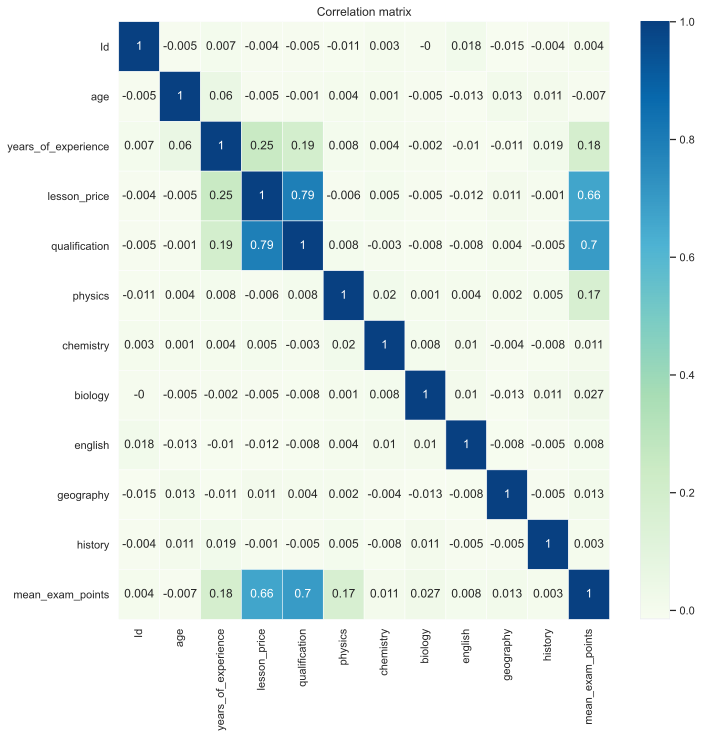

In [7]:
plt.figure(figsize = (11,11))

sns.set(font_scale=1)
sns.heatmap(df_train.corr().round(3), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

In [8]:
df_train['competencies'] = (df_train['physics'] +  df_train['chemistry'] + df_train['biology'] +  df_train['english'] + df_train['geography'] +  df_train['history'])
df_train['IQ'] =   df_train['qualification'] / df_train['age']  

df_test['competencies'] = (df_test['physics'] +  df_test['chemistry'] + df_test['biology'] +  df_test['english'] + df_test['geography'] +  df_test['history'])
df_test['IQ'] =   df_test['qualification'] / df_test['age']

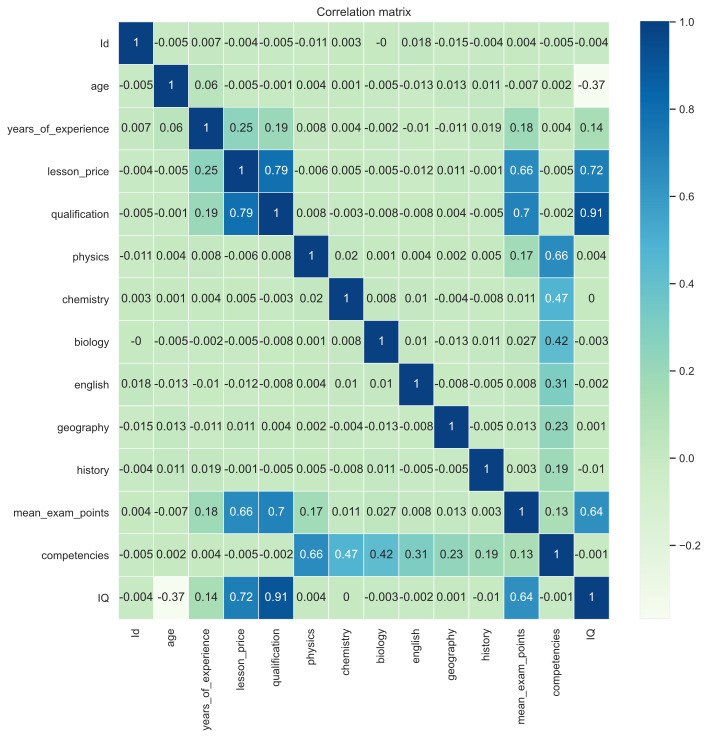

In [9]:
plt.figure(figsize = (11,11))

sns.set(font_scale=1)
sns.heatmap(df_train.corr().round(3), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

In [10]:
column_list = ['Id','chemistry','biology','english','geography','history']  
#column_list = ['Id']    

In [11]:
def drop_column(column_list, train, test):
    for col in column_list:
        train = train.drop([col], axis=1)
        test = test.drop([col], axis=1)
    return train, test

In [12]:
X_train, X_test =  drop_column(column_list, train = df_train, test = df_test)

In [13]:
X = X_train.drop('mean_exam_points', axis=1).values
y = X_train.mean_exam_points.values

In [14]:
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())

In [15]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm[:, 0] = min_max_scale(X_norm[:, 0])
X_norm[:, 1] = min_max_scale(X_norm[:, 1])
X_norm[:, 2] = min_max_scale(X_norm[:, 2])
X_norm[:, 3] = min_max_scale(X_norm[:, 3])
#X_norm[:, 4] = min_max_scale(X_norm[:, 4])
#X_norm[:, 5] = min_max_scale(X_norm[:, 5])
#X_norm[:, 6] = min_max_scale(X_norm[:, 6])
#X_norm[:, 7] = min_max_scale(X_norm[:, 7])
#X_norm[:, 8] = min_max_scale(X_norm[:, 8])
#X_norm[:, 9] = min_max_scale(X_norm[:, 9])
X_norm

array([[0.37777778, 0.        , 0.32      , ..., 1.        , 2.        ,
        0.025     ],
       [0.55555556, 0.4       , 0.70666667, ..., 1.        , 1.        ,
        0.0625    ],
       [0.35555556, 0.        , 0.26666667, ..., 0.        , 0.        ,
        0.02564103],
       ...,
       [0.24444444, 0.1       , 0.28      , ..., 1.        , 1.        ,
        0.02941176],
       [0.22222222, 0.3       , 0.24      , ..., 0.        , 0.        ,
        0.03030303],
       [0.26666667, 0.        , 0.33333333, ..., 0.        , 0.        ,
        0.02857143]])

In [16]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [17]:
X_st = X.copy().astype(np.float64)
X_st[:, 0] = standard_scale(X_st[:, 0])
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])
#X_st[:, 4] = standard_scale(X_st[:, 4])
#X_st[:, 5] = standard_scale(X_st[:, 5])
#X_st[:, 6] = standard_scale(X_st[:, 6])
#X_st[:, 7] = standard_scale(X_st[:, 7])
#X_st[:, 8] = standard_scale(X_st[:, 8])
#X_st[:, 9] = standard_scale(X_st[:, 9])
X_st

array([[-0.73077401, -1.1211401 , -0.56987533, ...,  1.        ,
         2.        ,  0.025     ],
       [ 0.26381464,  1.13603747,  2.19276398, ...,  1.        ,
         1.        ,  0.0625    ],
       [-0.85509759, -1.1211401 , -0.95092903, ...,  0.        ,
         0.        ,  0.02564103],
       ...,
       [-1.4767155 , -0.55684571, -0.85566561, ...,  1.        ,
         1.        ,  0.02941176],
       [-1.60103908,  0.57174308, -1.14145588, ...,  0.        ,
         0.        ,  0.03030303],
       [-1.35239192, -1.1211401 , -0.47461191, ...,  0.        ,
         0.        ,  0.02857143]])

In [18]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [40]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-2, reg=1e-8):
    W = np.random.randn(X.shape[1])
    #W = np.array([  0.48824195,  0.15201476,  0.01868846,  3.53774765,  2.53655019,
        #0.50097712,  0.08778773,  0.66707281, -0.18691642,  1.48026209,
        #1.99786627, -0.86179957])
       #0.49541632  0.15179783  0.01566182  6.13760456  3.60626404 -0.12664462 0.1394843   0.52249758 -0.29472847  1.261985    2.02099057 -0.67035459 
    W = np.array([  0.49103809, 0.15338215, 0.01820141, 3.89351793, 2.78049609,
       2.04032667, 1.62288564])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * np.sign(W) # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [ ]:
W = gradient_descent_reg_l1(X, y, iterations=10000000, eta=3.1601e-7, reg=0)

Iter: 0, weights: [0.49103809 0.15338215 0.01820141 3.89351847 2.78049631 2.04032679
 1.62288567], error 124.44945952334949
Iter: 1000000, weights: [0.49123246 0.15391153 0.01760837 4.39430837 2.97361413 2.12663197
 1.65301464], error 123.50845255870274
Iter: 2000000, weights: [0.49188686 0.153884   0.01710248 4.82495199 3.13060742 2.16533991
 1.6815831 ], error 122.8345543213136
Iter: 3000000, weights: [0.49275902 0.15384732 0.01666987 5.19520593 3.26199406 2.17463631
 1.70882244], error 122.34240879066773
Iter: 4000000, weights: [0.49370737 0.15385129 0.01629943 5.51348642 3.37472134 2.1661191
 1.73492716], error 121.97851207991825
Iter: 5000000, weights: [0.4946504  0.15388194 0.01598194 5.78704765 3.47342591 2.14716089
 1.76006156], error 121.70721972205304
Iter: 6000000, weights: [0.49554339 0.15392421 0.01570965 6.02213858 3.56124465 2.1224257
 1.78436505], error 121.50375046004777
Iter: 7000000, weights: [0.49636417 0.15396842 0.01547602 6.22413993 3.64033701 2.09484289
 1.80795

In [39]:
W

array([0.49103809, 0.15338215, 0.01820141, 3.89351793, 2.78049609,
       2.04032667, 1.62288564])

In [ ]:
predictions = np.dot(X_test, W)
predictions

In [ ]:
submit = pd.read_csv('sample_submission.csv', delimiter =',')
submit.head(3)

In [ ]:
submit['mean_exam_points'] = predictions
submit.head()

In [ ]:
submit.to_csv('csv_to_submit.csv', index=False)